### Metrics

Let $F$ represent the set of categorical features of all games $G$ in our dataset. Let $C_i$ where $i = \{1,2,3,4\}$ be a popularity grade class for any game in $G$. Then,

Importance Score:

$$
I_{i}(F_{j}) = \frac{Number \ of \ games \ with \ feature \ F_j \ in \ C_i}{Total \ number \ of \ games \ in \ C_i}
$$

Relative Importance Score:

$$
RI_{i}(F_{j}) = \frac{I_{i}(F_{j})}{\sum_{i=1}^4 I_{i}(F_{j})}
$$

Benefit Score:

$$
B_{i}(F_{j}) = \frac{Number \ of \ games \ with \ feature \ F_j \ in \ C_i}{Total \ number \ of \ games \ with \ F_j}
$$


In [1]:
#Take Ling's data and drop all columns except the independent categorical variables and
#target variable (avg_players over all months)

import pandas as pd
import numpy as np

data = pd.read_csv('../Ling/AllData.csv')
data=data[data['mean']>0]
proc_data=data.drop(['Name','Metacritic','App_id','ReleaseDate','SteamSpyOwners', 'SteamSpyOwnersVariance',
                      'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance', 'PriceCurrency','SupportEmail', 
                      'SupportURL', 'AboutText','Background', 'ShortDescrip', 'DetailedDescrip', 'DRMNotice',
                      'ExtUserAcctNotice', 'HeaderImage', 'LegalNotice', 'Reviews','RecommendationCount',
                      'SupportedLanguages', 'Website', 'PCMinReqsText', 'PCRecReqsText','SteamSpyOwnersNew', 
                      'peak_max','peak_mean', 'max','LinuxMinReqsText', 'LinuxRecReqsText', 'MacMinReqsText',
                      'MacRecReqsText','RequiredAge','DemoCount','DLCCount','DeveloperCount','MovieCount',
                      'PackageCount','PublisherCount','ScreenshotCount','AchievementCount',
                      'AchievementHighlightedCount','PriceInitial','PriceFinal'],axis=1)
len(proc_data.columns)

36

In [2]:
def create_grades(s):
    
    arr=np.ones(s.shape)
    
    for i in range(len(s)):
        if s[i]>=10000:
            arr[i]=4
        elif 1000<=s[i]<10000:
            arr[i]=3
        elif 100<=s[i]<1000:
            arr[i]=2
        else:
            arr[i]=1
    return pd.Series(arr)

proc_data['grade']=create_grades(proc_data['mean'])

In [3]:
for grade in proc_data['grade'].unique()[::-1]:
    print(grade)

1.0
2.0
3.0
4.0


In [4]:
def importance_score(df,feat):
    
    score=[]
    
    for grade in proc_data['grade'].unique()[::-1]:
        
        score.append(len(df[(df[feat]==True)&(df['grade']==grade)])/len(df['grade']==grade))
    
    return score

importance_score(proc_data,'IsFree')

[0.11243341267142695,
 0.03320865918621784,
 0.008160489629377763,
 0.001246741471154936]

In [5]:
importance_matrix=pd.DataFrame(index=proc_data['grade'].unique()[::-1])
for feat in proc_data.columns[:-2]:
    importance_matrix[feat]=importance_score(proc_data,feat)
importance_matrix

,ControllerSupport,IsFree,FreeVerAvail,PurchaseAvail,SubscriptionAvail,PlatformWindows,PlatformLinux,PlatformMac,PCReqsHaveMin,PCReqsHaveRec,...,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer
1.0,0.174204,0.112433,0.002947,0.657486,0.008501,0.794628,0.154029,0.251502,0.792588,0.455741,...,0.282444,0.235747,0.202312,0.172050,0.189618,0.089879,0.083192,0.041596,0.033435,0.033662
2.0,0.049076,0.033209,0.000907,0.119461,0.000567,0.157316,0.031055,0.055197,0.156749,0.111867,...,0.045789,0.023801,0.051570,0.046356,0.042276,0.022895,0.030375,0.009861,0.005894,0.017228
3.0,0.014734,0.008160,0.000453,0.030488,0.000340,0.040122,0.008614,0.013487,0.040009,0.031735,...,0.012921,0.004194,0.009861,0.013034,0.011901,0.006687,0.007707,0.002720,0.001133,0.006234
4.0,0.002380,0.001247,0.000113,0.006460,0.000113,0.007820,0.002834,0.003287,0.007707,0.006460,...,0.002040,0.000453,0.001927,0.002380,0.002380,0.001473,0.001247,0.001020,0.000227,0.000907


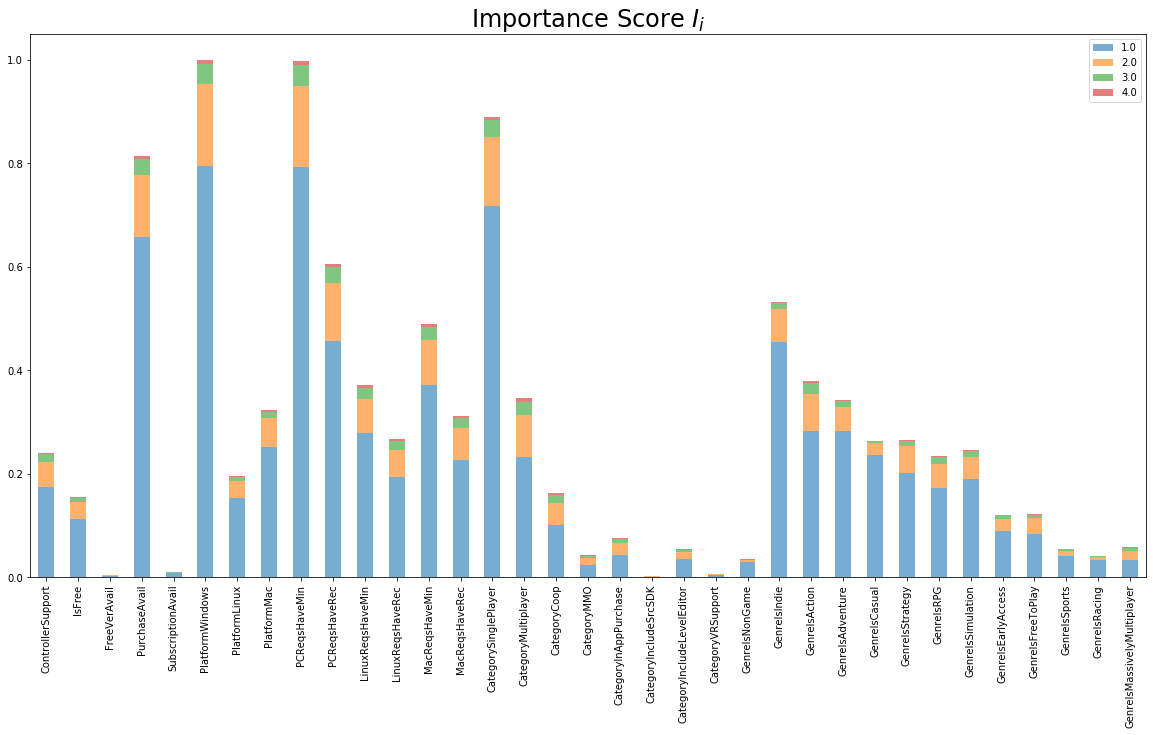

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))
importance_matrix.transpose().plot.bar(stacked=True, ax=ax, alpha=0.6)
ax.set_title('Importance Score $I_i$',fontsize=24)
plt.show()

In [7]:
def relative_importance_score(df,feat):
    
    all_scores=importance_score(df,feat)
    
    return [score/sum(all_scores) for score in all_scores]

relative_importance_score(proc_data,'IsFree')

[0.7251461988304093,
 0.21418128654970758,
 0.05263157894736842,
 0.00804093567251462]

In [8]:
relative_importance_matrix=pd.DataFrame(index=proc_data['grade'].unique()[::-1])
for feat in proc_data.columns[:-2]:
    relative_importance_matrix[feat]=relative_importance_score(proc_data,feat)
relative_importance_matrix

,ControllerSupport,IsFree,FreeVerAvail,PurchaseAvail,SubscriptionAvail,PlatformWindows,PlatformLinux,PlatformMac,PCReqsHaveMin,PCReqsHaveRec,...,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer
1.0,0.724658,0.725146,0.666667,0.807826,0.892857,0.794718,0.783737,0.777505,0.794930,0.752292,...,0.822985,0.892321,0.761519,0.735822,0.770258,0.743205,0.679001,0.753593,0.821727,0.580078
2.0,0.204149,0.214181,0.205128,0.146776,0.059524,0.157334,0.158016,0.170638,0.157213,0.184659,...,0.133421,0.090090,0.194113,0.198255,0.171731,0.189316,0.247919,0.178645,0.144847,0.296875
3.0,0.061292,0.052632,0.102564,0.037460,0.035714,0.040127,0.043829,0.041696,0.040127,0.052385,...,0.037649,0.015873,0.037116,0.055744,0.048343,0.055295,0.062905,0.049281,0.027855,0.107422
4.0,0.009901,0.008041,0.025641,0.007938,0.011905,0.007821,0.014418,0.010161,0.007730,0.010664,...,0.005945,0.001716,0.007253,0.010179,0.009669,0.012184,0.010176,0.018480,0.005571,0.015625


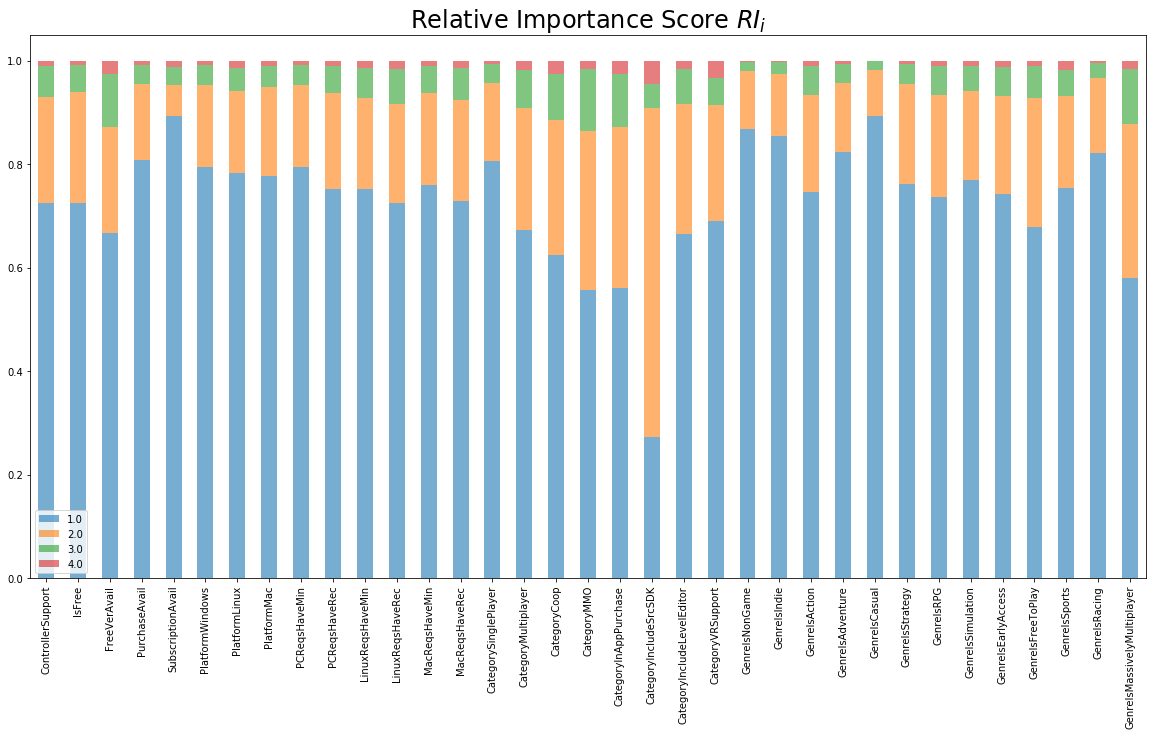

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
relative_importance_matrix.transpose().plot.bar(stacked=True, ax=ax, alpha=0.6)
ax.set_title('Relative Importance Score $RI_i$',fontsize=24)
plt.show()

In [10]:
def benefit_score(df,feat):
    
    score=[]
    
    for grade in proc_data['grade'].unique()[::-1]:
        
        score.append(len(df[(df[feat]==True)&(df['grade']==grade)])/len(df[feat]==True))
    
    return score

benefit_score(proc_data,'IsFree')

[0.11243341267142695,
 0.03320865918621784,
 0.008160489629377763,
 0.001246741471154936]

In [11]:
benefit_matrix=pd.DataFrame(index=proc_data['grade'].unique()[::-1])
for feat in proc_data.columns[:-2]:
    benefit_matrix[feat]=benefit_score(proc_data,feat)
benefit_matrix

,ControllerSupport,IsFree,FreeVerAvail,PurchaseAvail,SubscriptionAvail,PlatformWindows,PlatformLinux,PlatformMac,PCReqsHaveMin,PCReqsHaveRec,...,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer
1.0,0.174204,0.112433,0.002947,0.657486,0.008501,0.794628,0.154029,0.251502,0.792588,0.455741,...,0.282444,0.235747,0.202312,0.172050,0.189618,0.089879,0.083192,0.041596,0.033435,0.033662
2.0,0.049076,0.033209,0.000907,0.119461,0.000567,0.157316,0.031055,0.055197,0.156749,0.111867,...,0.045789,0.023801,0.051570,0.046356,0.042276,0.022895,0.030375,0.009861,0.005894,0.017228
3.0,0.014734,0.008160,0.000453,0.030488,0.000340,0.040122,0.008614,0.013487,0.040009,0.031735,...,0.012921,0.004194,0.009861,0.013034,0.011901,0.006687,0.007707,0.002720,0.001133,0.006234
4.0,0.002380,0.001247,0.000113,0.006460,0.000113,0.007820,0.002834,0.003287,0.007707,0.006460,...,0.002040,0.000453,0.001927,0.002380,0.002380,0.001473,0.001247,0.001020,0.000227,0.000907


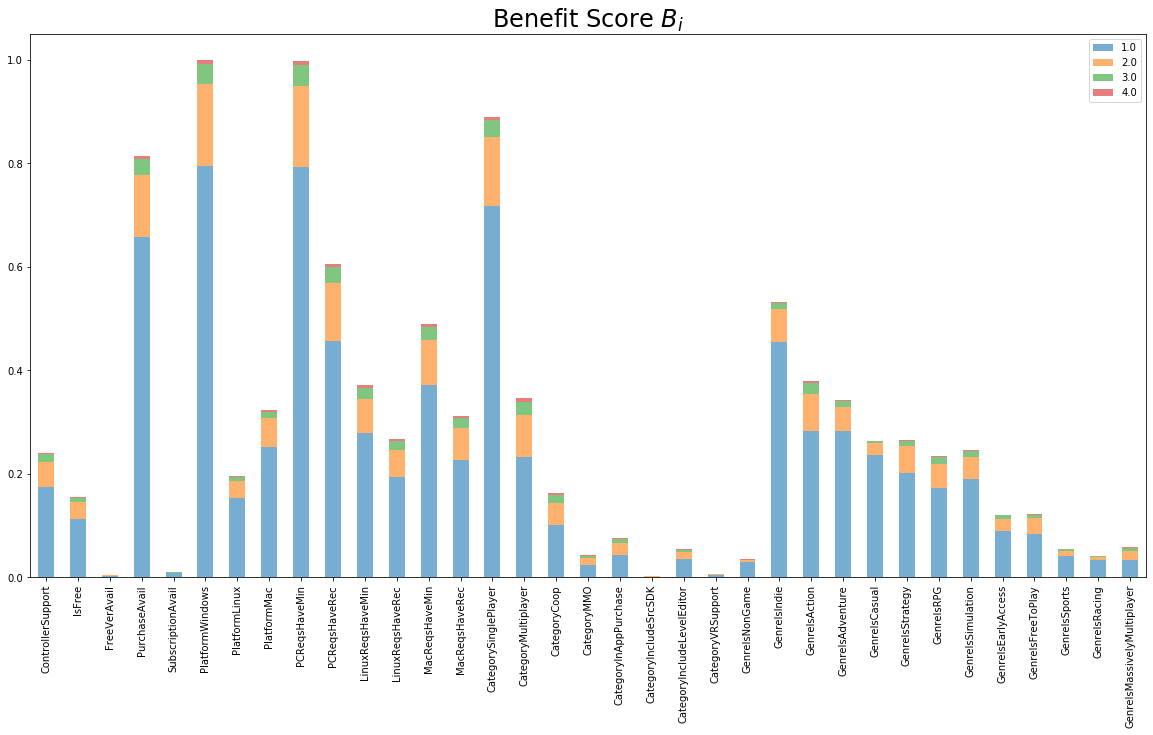

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
benefit_matrix.transpose().plot.bar(stacked=True, ax=ax, alpha=0.6)
ax.set_title('Benefit Score $B_i$',fontsize=24)
plt.show()

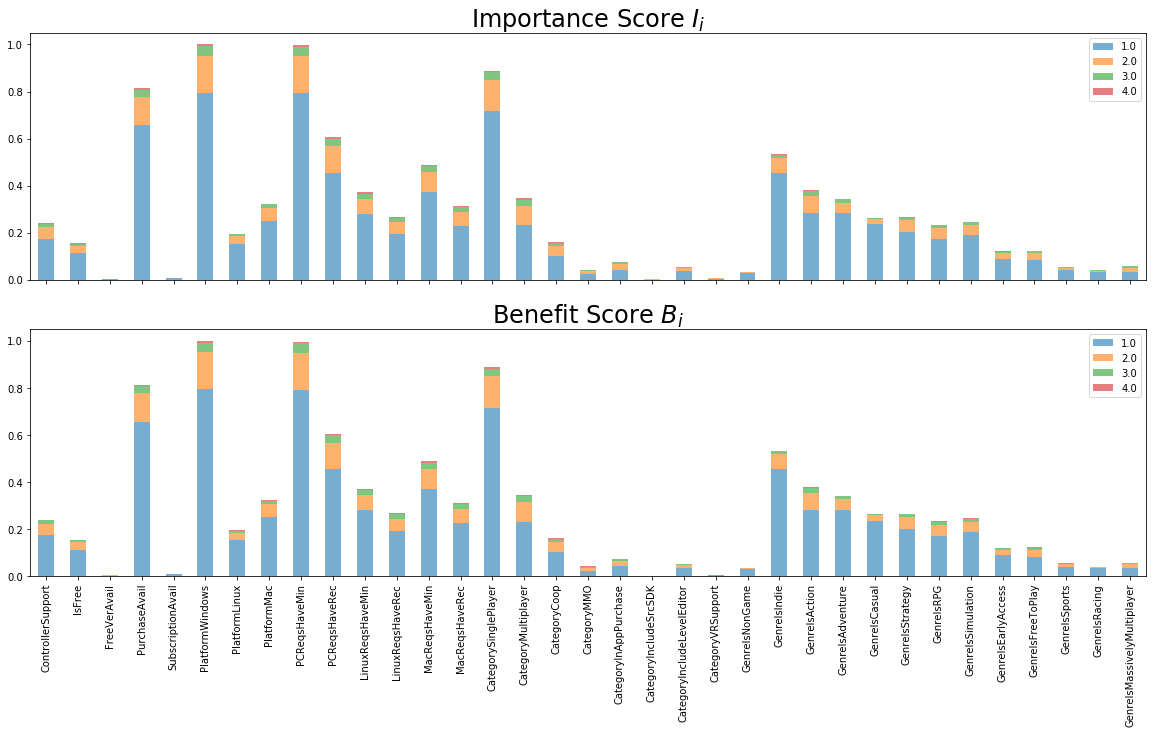

In [13]:
fig, ax = plt.subplots(2,1,figsize=(20,10),sharex=True)
importance_matrix.transpose().plot.bar(stacked=True, ax=ax[0], alpha=0.6)
ax[0].set_title('Importance Score $I_i$',fontsize=24)

benefit_matrix.transpose().plot.bar(stacked=True, ax=ax[1], alpha=0.6)
ax[1].set_title('Benefit Score $B_i$',fontsize=24)
plt.show()